<br><br>
<font size='6'><b>Decision Tree</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Decision-Tree" data-toc-modified-id="1.-Decision-Tree-1">1. Decision Tree</a></span><ul class="toc-item"><li><span><a href="#1.1.-Nonlinear-Classification" data-toc-modified-id="1.1.-Nonlinear-Classification-1.1">1.1. Nonlinear Classification</a></span></li><li><span><a href="#1.2.-Multiclass-Classification" data-toc-modified-id="1.2.-Multiclass-Classification-1.2">1.2. Multiclass Classification</a></span></li></ul></li></ul></div>

# 1. Decision Tree

- A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [1]:
%%html
<center><iframe src="https://www.youtube.com/embed/SXBG3RGr_Rc?rel=0" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

<center><img src='./image_files/table.png' width = 500></center>

- Feature test

- Homogeneous set


- Issue: a large data set will be most likely to produce zero homogeneous set

- Disorder of single set

$$\begin{align*}
D & = -x \log_2 x - (1-x) \log_2 (1-x)\\ \\ 
D & = -\frac{G}{T} \log_2 \frac{G}{T} - \frac{B}{T} \log_2 \frac{B}{T} \qquad \text{where }\; G: \text{Good}, \; B: \text{Bad},\; T: \text{Total}\\ \\
\text{When }\; \frac{G}{T} & = \frac{1}{2} \Rightarrow \left( -\frac{1}{2} \log_2 \frac{1}{2} \right) \times 2 = 1 \\ \\
\text{When }\;\frac{G}{T} & = 1 \Rightarrow  -1 \log_2 1 - 0 \log_2 0 = 0
\end{align*}
$$

- Quality of test


$$Q(\text{test}) = \sum D(\text{set}) \times \frac{\text{# of samples in set}}{\text{# of samples in all sets}}$$

/home/pirl/anaconda3/envs/py378/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/home/pirl/anaconda3/envs/py378/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


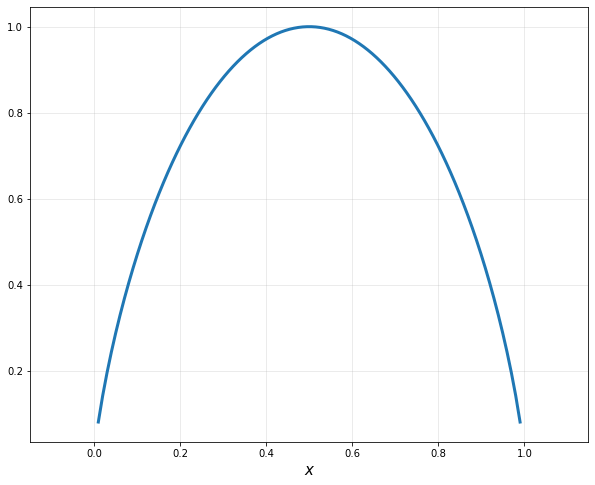

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 1, 100)
y = -x*np.log2(x) - (1-x)*np.log2(1-x)

plt.figure(figsize = (10, 8))
plt.plot(x, y, linewidth = 3)
plt.xlabel(r'$x$', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

In [14]:
# Quality of test(bk)

def D(x):
    y = -x*np.log2(x) - (1-x)*np.log2(1-x)
    return y

D(np.array([0.3, 0.5]))

array([0.8812909, 1.       ])

<center><img src='./image_files/table.png' width = 500></center>

<br><br>
<center><img src='./image_files/learned_tree.png' width = 300></center>

<br><br>
<center><img src='./image_files/table_number.png' width = 500></center>

In [10]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image

In [16]:
data = np.array([[0, 0, 1, 0, 0],
                [1, 0, 2, 0, 0],
                [0, 1, 2, 0, 1],
                [2, 1, 0, 2, 1],
                [0, 1, 0, 1, 1],
                [1, 1, 1, 2, 0],
                [1, 1, 0, 2, 0],
                [0, 0, 2, 1, 0]])      
# Data
x = data[:, :4]
y = data[:, 4]

print(x, '\n')
print(y)

[[0 0 1 0]
 [1 0 2 0]
 [0 1 2 0]
 [2 1 0 2]
 [0 1 0 1]
 [1 1 1 2]
 [1 1 0 2]
 [0 0 2 1]] 

[0 0 1 1 1 0 0 0]


In [17]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=0)
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
clf.predict([[0, 0, 1, 0]])

array([0])

Clink the [link](https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.zip) to download "graphviz-2.38.zip". Then unzip and place it to the same folder of this jupyter notebook. 

In [8]:
# just run this cell to set the PATH variable.

import os, sys
PATH = 'graphviz-2.38\\release\\bin'
os.environ["PATH"] += os.pathsep + PATH

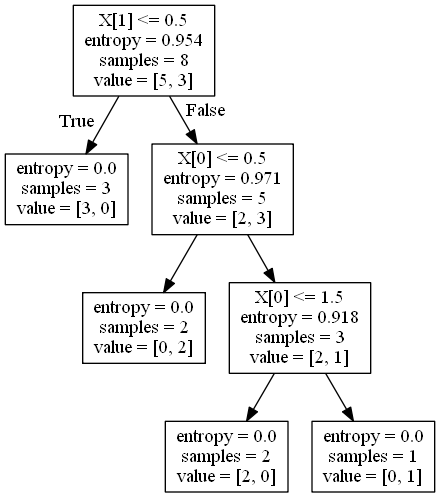

In [9]:
dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# look different from what we compute by hands because "tree.DecisionTreeClassifier" uses a binary classifier

## 1.1. Nonlinear Classification

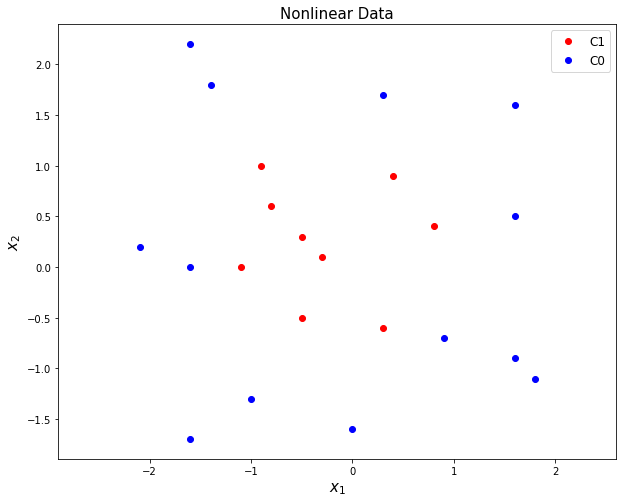

In [21]:
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])


X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10,8))
plt.plot(X1[:,0], X1[:,1], 'ro', label='C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label='C0')
plt.title('Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15)
plt.legend(loc = 1, fontsize=12)
plt.axis('equal')
plt.show()

In [25]:
# train x, train y
N = X1.shape[0]
M = X0.shape[0]

X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

In [31]:
# classifier
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state=0)
clf2.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [28]:
clf2.predict([[0, 1]])

array([1.])

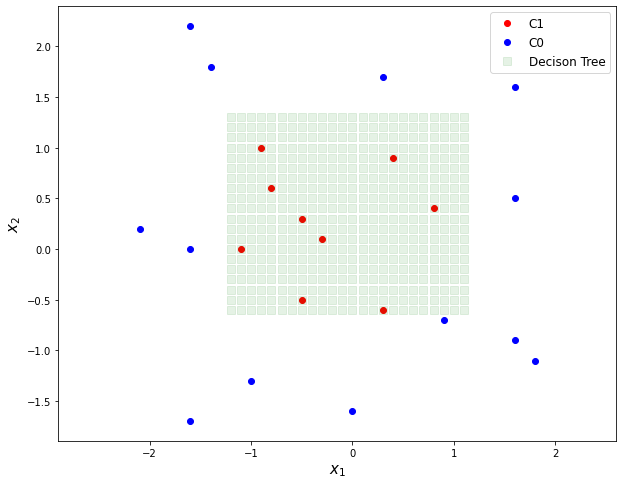

In [35]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

q = clf2.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]

plt.figure(figsize = (10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.plot(Xp[C1,0], Xp[C1,1], 'gs', markersize = 8, alpha = 0.1, label = 'Decison Tree')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

## 1.2. Multiclass Classification

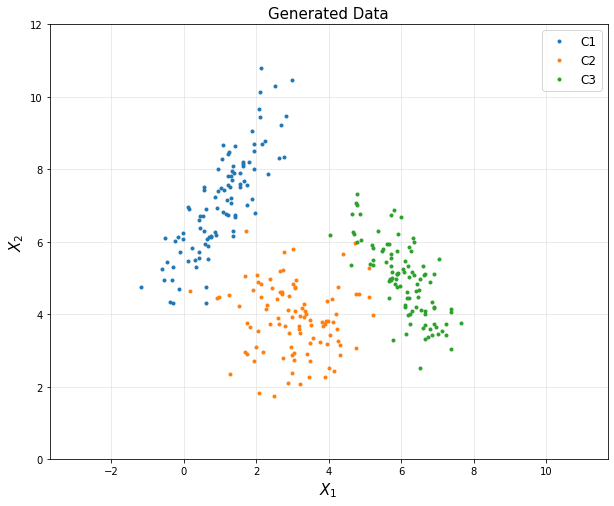

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate three simulated clusters
mu1 = np.array([1, 7])
mu2 = np.array([3, 4])
mu3 = np.array([6, 5])

SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
SIGMA2 = 0.5*np.array([[2, 0],
                       [0, 2]])
SIGMA3 = 0.5*np.array([[1, -1],
                       [-1, 2]])

X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)
X3 = np.random.multivariate_normal(mu3, SIGMA3, 100)

y1 = 1*np.ones([100,1])
y2 = 2*np.ones([100,1])
y3 = 3*np.ones([100,1])

plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [46]:
X = np.vstack([X1, X2, X3])
y = np.vstack([y1, y2, y3])

# classifier
clf3 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state=0)
clf3.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

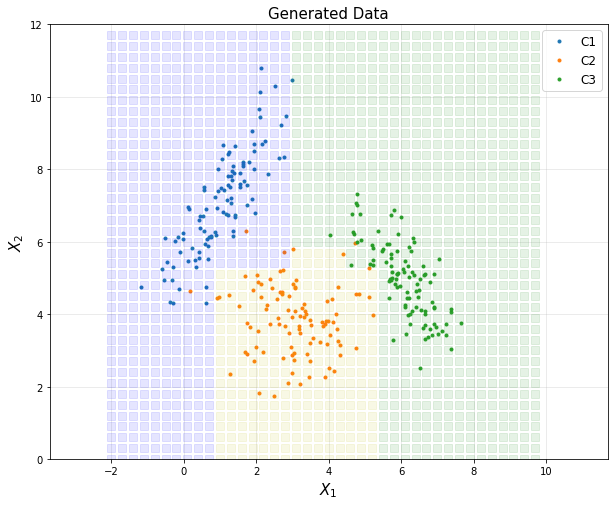

In [52]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2, 10, res), np.arange(0, 12, res))

# plot

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

q = clf3.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.plot(Xp[C1,0], Xp[C1,1], 'bs', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 'ys', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 'gs', markersize = 8, alpha = 0.1)
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()